In [1]:
# Import packages, download data, and set working directory here
import os


import numpy as np
import matplotlib.pyplot as plt
import fiona 
import geopandas as gpd
import rasterio as rio
import zipfile 
import earthpy as et


#et.data.get_data("spatial-vector-lidar")
# Set working directory
os.chdir(os.path.join(et.io.HOME,
                      "earth-analytics",
                      "capstone_project",
                      "data"))

# Get data - unzip https://stackoverflow.com/questions/3451111/unzipping-files-in-python
# GRAND - Global Reservoir And Dam Database - http://globaldamwatch.org/
with zipfile.ZipFile("GRanD_Version_1_3.zip"," r") as zip_ref:
    zip_ref.extractall("temp")
    print('File is unzipped in temp folder') 
    
# World's free-flowing rivers dataset https://figshare.com/articles/dataset/Mapping_the_world_s_free-flowing_rivers_data_set_and_technical_documentation/7688801
with zipfile.ZipFile("Mapping the worlds free-flowing rivers_Data_Geodatabase.zip","r") as zip_ref:
    zip_ref.extractall("temp")
    print('River file is unzipped in temp folder')

File is unzipped in temp folder
River file is unzipped in temp folder


['Hydroelectricity' None 'Water supply' 'Other' 'Recreation' 'Irrigation'
 'Flood control' 'Fisheries' 'Navigation']
Number of observations without main dam use = 1561


<AxesSubplot:>

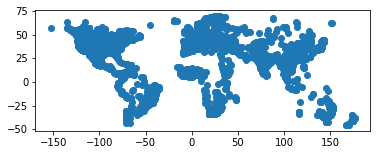

In [3]:
# Data exploration of GRanD dam and reservoir data
# Define path to file GRAND - Global Reservoir And Dam Database - http://globaldamwatch.org/
plot_dam_path = os.path.join("temp",
                                 "GRanD_Version_1_3", "GRanD_dams_v1_3.shp")

# Import shapefile using geopandas
grand_dam_locations = gpd.read_file(plot_dam_path)
# View top 6 rows of attribute table
grand_dam_locations.head(6)

# Column names https://cmdlinetips.com/2020/04/how-to-get-column-names-as-list-in-pandas/#:~:text=We%20can%20get%20the%20names,using%20Pandas%20method%20%E2%80%9Ccolumns%E2%80%9D.&text=Pandas'%20columns%20method%20returns%20the%20names%20as%20Pandas%20Index%20object.&text=We%20can%20convert%20the%20Pandas,using%20the%20tolist()%20method.
grand_dam_locations.columns
# count_row = grand_dam_locations.shape[0]  # Gives number of rows = 7320
# count_col = grand_dam_locations.shape[1]  # Gives number of columns = 59
# #count_row

# Classes in dam purpose
print (grand_dam_locations['MAIN_USE'].unique())
#['Hydroelectricity' None 'Water supply' 'Other' 'Recreation' 'Irrigation'
# 'Flood control' 'Fisheries' 'Navigation']

#Number of observations missing MAIN_USE class (n = 1761 out of 7320)
# https://medium.com/analytics-vidhya/python-finding-missing-values-in-a-data-frame-3030aaf0e4fd#:~:text=We%20can%20use%20pandas%20%E2%80%9Cisnull,()%20which%20is%20shown%20below.
print('Number of observations without main dam use =', grand_dam_locations['MAIN_USE'].isnull().sum())

# # # View the geometry type of each row
#grand_dam_locations.geom_type

# Plot points
grand_dam_locations.plot()

C:\Users\Owner\miniconda3\envs\earth-analytics-python\lib\site-packages\fiona\collection.py:350: FionaDeprecationWarning: Collection slicing is deprecated and will be disabled in a future version.
  return self.session.__getitem__(item)


<AxesSubplot:>

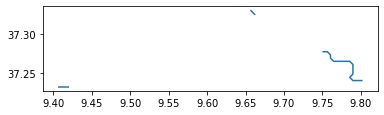

In [11]:
# Worlds Free-flowing rivers # https://figshare.com/articles/dataset/Mapping_the_world_s_free-flowing_rivers_data_set_and_technical_documentation/7688801

## NOTE: The geodatabase is large and it was not loading on my computer as a whole
# rather I was able to select parts of the database to be able to work with it

###########
## METHOD 1: Select specific rows
# https://gis.stackexchange.com/questions/220023/only-read-specific-rows-of-a-shapefile-with-geopandas-fiona

# Function to open features in geodatabase
def records(filename, list):
    list = sorted(list) # if the elements of the list are not sorted
    with fiona.open(filename) as source:
        for i, feature in enumerate(source[:max(list)+1]):
            if i in list:
                yield feature

# Path where geodatabase is unzipped
river_path = os.path.join("temp",
                          "Mapping the worlds free-flowing rivers_Data_Geodatabase", 
                          "FFR_river_network.gdb")

test = gpd.GeoDataFrame.from_features(records(river_path, [4,0,7]))
test
#test.plot()

In [8]:
############
# METHOD 2: Use a bounding box to select subset of data
# https://geopandas.org/docs/user_guide/io.html
# US bounding box values https://gist.github.com/graydon/11198540

# Specify bounding box coordinates
bbox = (-171.791110603, 18.91619, -66.96466, 71.3577635769)

# Path where geodatabase is unzipped
river_path = os.path.join("temp",
                          "Mapping the worlds free-flowing rivers_Data_Geodatabase", 
                          "FFR_river_network.gdb")

gdf = gpd.read_file(river_path,
    bbox=bbox)

gdf.head()

C:\Users\Owner\miniconda3\envs\earth-analytics-python\lib\site-packages\geopandas\geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


,REACH_ID,GOID,NOID,NUOID,NDOID,CON_ID,CONTINENT,COUNTRY,BAS_ID,BAS_NAME,...,RDD,FLD,CSI,CSI_D,CSI_FF,CSI_FF1,CSI_FF2,CSI_FFID,Shape_Length,geometry
0,70000001.0,7030255,7030255,,0,1,North America,Canada,1519451,,...,0.0,86.842003,100.0,NAN,1,1,1,3636077,0.018035,"MULTILINESTRING ((-74.07292 62.65833, -74.0729..."
1,70000002.0,7030256,7030256,,0,1,North America,Canada,1519450,,...,0.0,84.674004,100.0,NAN,1,1,1,3636078,0.041605,"MULTILINESTRING ((-74.18750 62.64375, -74.1937..."
2,70000003.0,7030257,7030257,,0,1,North America,Canada,1525056,,...,0.0,19.424000,100.0,NAN,1,1,1,3636079,0.028809,"MULTILINESTRING ((-77.44167 62.54375, -77.4312..."
3,70000004.0,7030258,7030258,,0,1,North America,Canada,1527094,,...,0.0,40.952000,100.0,NAN,1,1,1,3636080,0.014583,"MULTILINESTRING ((-77.07708 62.51250, -77.0770..."
4,70000005.0,7030259,7030259,,0,1,North America,Canada,1525332,,...,0.0,13.208000,100.0,NAN,1,1,1,3636081,0.072646,"MULTILINESTRING ((-77.47083 62.50417, -77.4395..."


<AxesSubplot:>

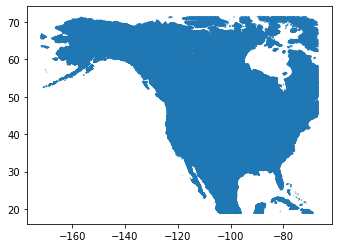

In [9]:
gdf.plot()

In [10]:
gdf.columns

Index(['REACH_ID', 'GOID', 'NOID', 'NUOID', 'NDOID', 'CON_ID', 'CONTINENT',
       'COUNTRY', 'BAS_ID', 'BAS_NAME', 'LENGTH_KM', 'VOLUME_TCM',
       'UPLAND_SKM', 'DIS_AV_CMS', 'RIV_ORD', 'ERO_YLD_TON', 'HYFALL', 'BB_ID',
       'BB_NAME', 'BB_LEN_KM', 'BB_DIS_ORD', 'BB_VOL_TCM', 'BB_OCEAN', 'INC',
       'DOF', 'DOR', 'SED', 'USE', 'URB', 'RDD', 'FLD', 'CSI', 'CSI_D',
       'CSI_FF', 'CSI_FF1', 'CSI_FF2', 'CSI_FFID', 'Shape_Length', 'geometry'],
      dtype='object')

In [ ]:
# # World's free flowing river data import - NOT WORKING - COMPUTER SHUTS DOWN
# # Data exploration 
# # Define path to file World's free-flowing river dataset - 
# # https://figshare.com/articles/dataset/Mapping_the_world_s_free-flowing_rivers_data_set_and_technical_documentation/7688801
# river_path = os.path.join("temp",
#                                "Mapping the worlds free-flowing rivers_Data_Geodatabase", 
#                                "FFR_river_network.gdb")

# # Get all the layers from the .gdb file 
# # https://gis.stackexchange.com/questions/32762/how-to-access-feature-classes-in-file-geodatabases-with-python-and-gdal
# # https://gis.stackexchange.com/questions/255138/reading-the-names-of-geodatabase-file-layers-in-python
# layers = fiona.listlayers(river_path) #'FFR_river_network_v1'

# gdb_river = gpd.read_file(river_path, driver='FileGDB', layer='FFR_river_network_v1')
# # for layer in layers:
# #     gdf = gpd.read_file(plot_river_path,layer=layer)
# #     # Do stuff with the gdf
# #     gdf.head()
# # # Import shapefile using geopandas
# # gdb_river = gpd.read_file(plot_river_path) 

# # gdb_river.head()


# # # Import shapefile using geopandas
# # grand_dam_locations = gpd.read_file(plot_dam_path)